# NOAA SDK in Python 3 (Ubuntu Linux)

https://github.com/paulokuong/noaa

In [1]:
from noaa_sdk import noaa
n = noaa.NOAA()

In [4]:
fc = n.get_forecasts(postal_code="30005", country='US', hourly=True)[:48]
fc[:2]

[{'number': 1,
  'name': '',
  'startTime': '2018-11-30T13:00:00-05:00',
  'endTime': '2018-11-30T14:00:00-05:00',
  'isDaytime': True,
  'temperature': 58,
  'temperatureUnit': 'F',
  'temperatureTrend': None,
  'windSpeed': '5 mph',
  'windDirection': 'SW',
  'icon': 'https://api.weather.gov/icons/land/day/rain,20?size=small',
  'shortForecast': 'Slight Chance Light Rain',
  'detailedForecast': ''},
 {'number': 2,
  'name': '',
  'startTime': '2018-11-30T14:00:00-05:00',
  'endTime': '2018-11-30T15:00:00-05:00',
  'isDaytime': True,
  'temperature': 58,
  'temperatureUnit': 'F',
  'temperatureTrend': None,
  'windSpeed': '5 mph',
  'windDirection': 'SW',
  'icon': 'https://api.weather.gov/icons/land/day/rain,20?size=small',
  'shortForecast': 'Slight Chance Light Rain',
  'detailedForecast': ''}]

In [5]:
# convert short forecast wording to numeric level
# only order matters: 0, 1, 2
def snow_number(s):
    if 'Heavy Snow' in s:
        ret = 2
    elif 'Snow' in s:
        ret = 1
    else:
        ret = 0
    return ret

In [0]:
import pandas as pd
df = pd.DataFrame(fc)[['startTime','temperature','shortForecast']]
# fix types
df['Time'] = pd.to_datetime(df['startTime'])
df['Snowfall'] = df['shortForecast'].apply(snow_number)
df = df.set_index('Time')
df.head()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f00f4c14cc0>,
      dtype=object)

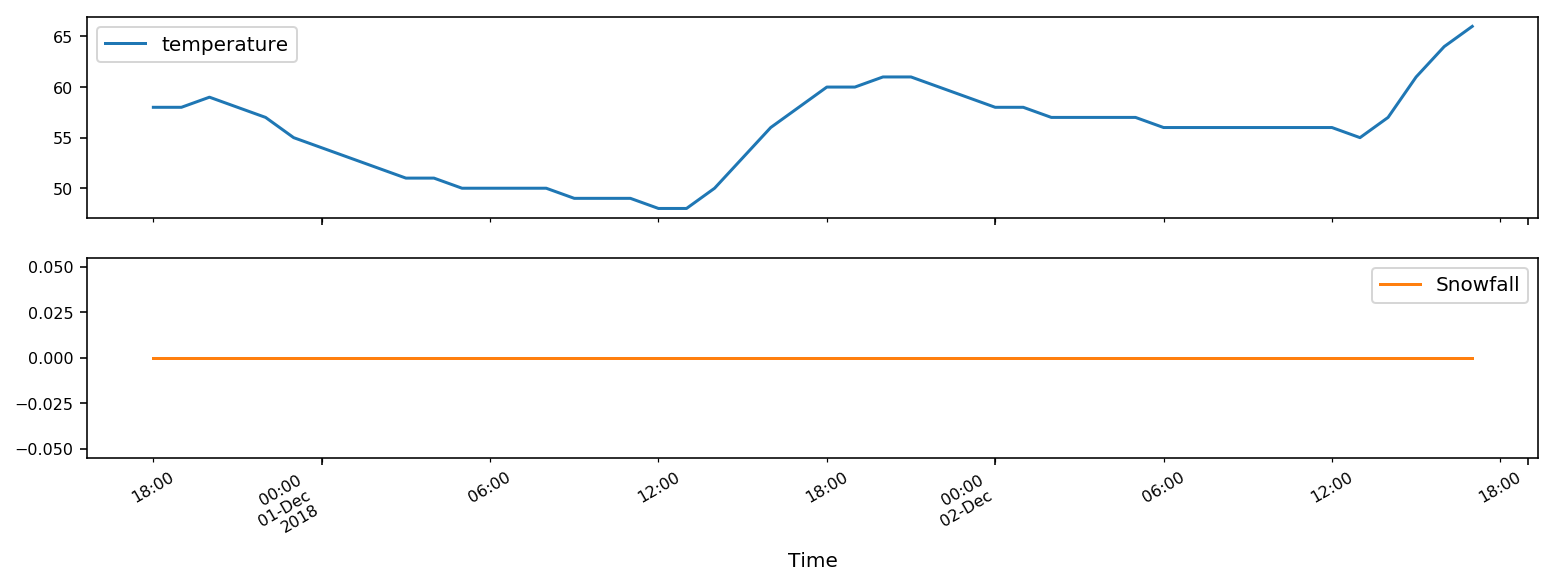

In [7]:
df[['temperature','Snowfall']].plot(subplots=True, sharex=True, figsize=(13,4.5), fontsize=8)